<a href="https://colab.research.google.com/github/tangirene/cs-4501/blob/main/irene_ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Frequency smoothing


In [ ]:
"""
questions for oh:
1. how to source/credit external resources
2. 'centering' mask when image size is even and mask size is odd?
  e.g. for 512x512 and 7x7, leave as 6x6?
3. clean up code necessary? e.g. prints
"""

In [1]:
import numpy as np
from PIL import Image

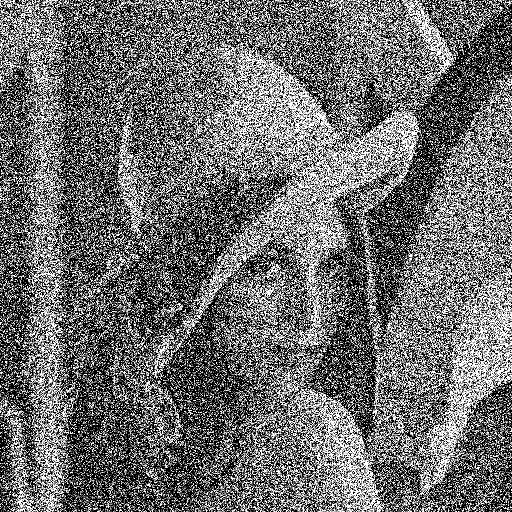

In [2]:
# load image
image = Image.open("/content/drive/MyDrive/irene stuff/lenaNoise.png")
display(image)

In [3]:
array = np.array(image)
print(type(array))
print(array.shape)

<class 'numpy.ndarray'>
(512, 512)


In [4]:
fft = np.fft.fft2(array)
print(fft)
print(fft.shape)

[[ 2.89270700e+07      +0.j         -1.98961715e+05+1747602.75720335j
   9.73926204e+05 -599117.35434791j ... -8.83395696e+04 -436891.19649332j
   9.73926204e+05 +599117.35434791j -1.98961715e+05-1747602.75720335j]
 [-7.89627886e+04 -659382.23859455j -7.88491611e+05+1148791.15511149j
  -7.70799123e+05 -202434.16386914j ...  4.00423648e+05 +732564.2142579j
  -2.08612390e+05 +181725.92101139j  5.79375127e+03 +814528.65267266j]
 [-3.73421134e+05  +47351.06349966j -2.03722387e+05 -131997.46352457j
   4.79196878e+05 -346785.78986061j ...  2.82718387e+05 +702176.07786461j
  -5.56228834e+05 -215918.5130415j   6.30464742e+05  -40857.96055961j]
 ...
 [ 3.12329639e+05 -214785.93534308j  5.29711101e+05 +490286.08162304j
  -4.06171850e+05 -124055.90823769j ...  7.06535023e+05 +115268.80590266j
   2.80102871e+04 -297036.70525557j  2.52447725e+04 +316798.20620438j]
 [-3.73421134e+05  -47351.06349966j  6.30464742e+05  +40857.96055961j
  -5.56228834e+05 +215918.5130415j  ... -3.25710784e+05 -406991.25

In [5]:
# fftshift to move low freq to center)
fftshift = np.fft.fftshift(fft)
print(fftshift)

[[ 29658.            +0.j          29316.63163039+14477.69146795j
  -48512.14731403-40811.57080227j ...   1511.80146668+23127.64399522j
  -48512.14731403+40811.57080227j  29316.63163039-14477.69146795j]
 [-43290.90814853-17202.23732646j -52152.23577667-13174.37168505j
   12078.23873321+24490.04590063j ... -11931.87392537 +9623.00604827j
  -68413.90003696+35585.32460055j  29692.33311497 -3553.4446972j ]
 [-40758.05981   +54968.93354304j  22887.32683276 -3611.19920119j
  -48769.01445178+48446.91053499j ...  35808.89438379-50946.35403436j
  -29098.71790466+67625.36321637j  -8881.56102674 -7316.87425602j]
 ...
 [ 14534.28564232-35598.01797021j  38438.45103584-34823.94110166j
    1331.05647101+17953.11721513j ... -60551.73665555+17009.13871371j
    9254.34591982+11319.50873641j  34048.85524244+38866.22782328j]
 [-40758.05981   -54968.93354304j  -8881.56102674 +7316.87425602j
  -29098.71790466-67625.36321637j ...  11623.53048073 -2670.57769065j
  -48769.01445178-48446.91053499j  22887.326832

In [6]:
# extract low frequencies w different mask sizes
# low pass filter
print(fftshift.dtype) # complex type
print(fftshift.shape) # image is even sized so fft center is a little "off"?

def low_pass_filter(fftshift, mask_size):
    image_y, image_x = fftshift.shape
    new_mask = np.zeros((image_y, image_x), dtype=np.complex128)
    center_y = image_y // 2
    center_x = image_x // 2

    half_mask_size = mask_size // 2

    # top
    y_min = max(0, center_y - half_mask_size)
    #print(y_min)
    # bottom
    y_max = min(image_y, center_y + half_mask_size + (mask_size % 2)) # adjust for odd mask
    #print(y_max)
    # left
    x_min = max(0, center_x - half_mask_size)
    #print(x_min)
    # right
    x_max = min(image_x, center_x + half_mask_size + (mask_size % 2))
    #print(x_max)

    new_mask[y_min:y_max, x_min:x_max] = 1 # up to but not including :_max

    apply_filter = fftshift * new_mask
    return apply_filter

complex128
(512, 512)


In [20]:
# looking at mask dimms
print(low_pass_filter(fftshift, 3))

[[ 0.+0.j  0.+0.j  0.-0.j ...  0.+0.j -0.+0.j  0.+0.j]
 [ 0.-0.j  0.-0.j  0.+0.j ... -0.+0.j -0.+0.j  0.+0.j]
 [-0.+0.j  0.+0.j -0.+0.j ...  0.+0.j -0.+0.j  0.-0.j]
 ...
 [ 0.+0.j  0.+0.j  0.+0.j ... -0.+0.j  0.+0.j  0.+0.j]
 [ 0.-0.j -0.+0.j  0.-0.j ...  0.+0.j  0.-0.j  0.+0.j]
 [-0.+0.j  0.+0.j  0.-0.j ...  0.-0.j  0.+0.j -0.+0.j]]


In [28]:
print (3//2)
print(fftshift.shape[0])
# reconstruct the og image by using new generated freqs ^
mask_sizes = [3, 7, 15, 31, 95, fftshift.shape[0]] #512
reconstructed_imgs = []
for size in mask_sizes:
    filtered = low_pass_filter(fftshift, size) # apply low pass filter
    f_ishift = np.fft.ifftshift(filtered) # undo fftshift
    reconstruct = np.fft.ifft2(f_ishift) # reconstruct img
    reconstruct = np.real(reconstruct) # plt.imshow expects reals
    reconstructed_imgs.append((size, reconstruct))

1
512


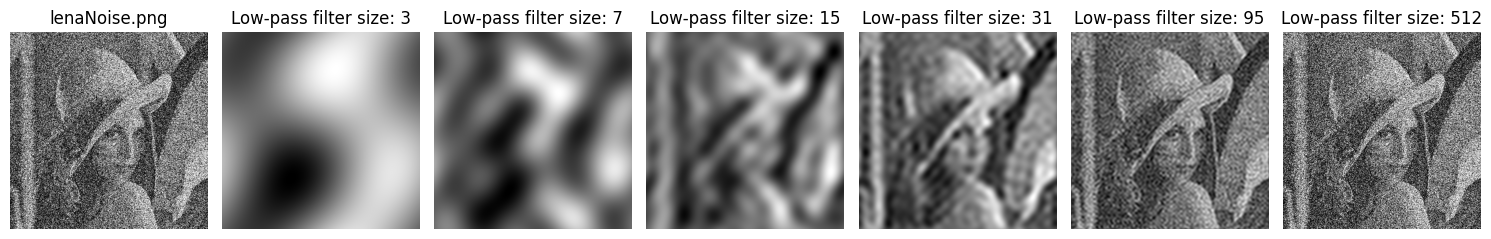

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(1, 7, 1) # start at 1
plt.imshow(array, cmap="gray")
plt.title("lenaNoise.png")
plt.axis("off")

for i, (size, reconstruct) in enumerate(reconstructed_imgs, 2): # start at 2
    plt.subplot(1, 7, i)
    plt.imshow(reconstruct, cmap='gray')
    plt.title(f"Low-pass filter size: {size}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# TODO: can try gaussian blur for kernel.

## 2. Gradient Descent Implementation

In [ ]:
"""
implement your own gd algorithm
1. with given einsten.jpeg, generate different nosiy images w additive gaussian noises at diff variance
2. use central diff scheme to compute image gradient (numpy.gradient)
  use your own divergence operator
3. run algorithm on generated images from (1)
  may need to tune weighting parameter and learning rate
4. plot convergence graph reporting objective fx over all iters
"""

In [23]:
import os

# --- 1. Define the Denoising Class and Methods ---

class ROFDenoising:
    """
    Implements the Rudin-Osher-Fatemi (ROF) Total Variation denoising model
    using the Gradient Descent algorithm.
    """
    def __init__(self, f, alpha, lambda_):
        """
        Initialize the denoiser with a noisy image, learning rate, and weighting parameter.

        Args:
            f (np.ndarray): The original noisy image (assumed to be a grayscale 2D array).
            alpha (float): The learning rate/step size for gradient descent.
            lambda_ (float): The weighting parameter for the data fidelity term.
        """
        self.f = f.astype(np.float64) / 255.0  # Normalize image to [0, 1]
        self.u = self.f.copy()  # Initialize the denoised image as the noisy image
        self.alpha = alpha
        self.lambda_ = lambda_
        self.energy_history = []

    def compute_energy(self):
        """
        Computes the energy function E(u) as defined in the class notes.
        E(u) = lambda * ||f - u||_L2^2 + ||grad(u)||_L2
        """
        # Data fidelity term: lambda * ||f - u||_L2^2
        fidelity_term = self.lambda_ * np.sum((self.f - self.u)**2)

        # Regularization term (Total Variation): sum(||grad(u)||_L2)
        grad_u_x, grad_u_y = np.gradient(self.u)
        grad_magnitude = np.sqrt(grad_u_x**2 + grad_u_y**2)
        regularization_term = np.sum(grad_magnitude)

        return fidelity_term + regularization_term

    def compute_divergence(self, px, py):
        """
        Computes the divergence of a 2D vector field (px, py).
        This must be implemented manually using the gradient function.
        div(p) = d(px)/dx + d(py)/dy
        """
        div_px, _ = np.gradient(px)
        _, div_py = np.gradient(py)
        return div_px + div_py

    def gradient_descent_step(self):
        """
        Performs a single step of the gradient descent algorithm.
        u_k+1 = u_k - alpha * grad_E(u_k)
        """
        # Compute the gradient of u
        grad_u_x, grad_u_y = np.gradient(self.u)

        # Calculate the magnitude of the gradient, with a small epsilon to avoid division by zero
        grad_magnitude = np.sqrt(grad_u_x**2 + grad_u_y**2) + 1e-8

        # Compute the normalized gradient vector field
        normalized_grad_u_x = grad_u_x / grad_magnitude
        normalized_grad_u_y = grad_u_y / grad_magnitude

        # Compute the divergence term: div(normalized_grad(u))
        divergence_term = self.compute_divergence(normalized_grad_u_x, normalized_grad_u_y)

        # Compute the full gradient of the energy function
        grad_E = -2 * self.lambda_ * (self.f - self.u) - divergence_term

        # Update the image u
        self.u -= self.alpha * grad_E

    def run_denoising(self, iterations):
        """
        Runs the gradient descent algorithm for a specified number of iterations.
        """
        for i in range(iterations):
            self.gradient_descent_step()
            energy = self.compute_energy()
            self.energy_history.append(energy)
            if (i + 1) % 50 == 0:
                print(f"Iteration {i+1}: Energy = {energy:.4f}")

    def save_results(self, output_dir, file_prefix):
        """
        Saves the denoised image and the convergence graph.
        """
        # Create output directory if it doesn't exist
        os.makedirs(output_dir, exist_ok=True)

        # Save the denoised image
        denoised_image = np.clip(self.u * 255, 0, 255).astype(np.uint8)
        pil_image = Image.fromarray(denoised_image)
        image_filename = os.path.join(output_dir, f"{file_prefix}_denoised.png")
        pil_image.save(image_filename)
        print(f"Denoised image saved to: {image_filename}")

        # Plot the convergence graph
        plt.figure()
        plt.plot(self.energy_history)
        plt.title(f'Convergence Graph ({file_prefix})')
        plt.xlabel('Iterations')
        plt.ylabel('Energy E(u)')
        plt.grid(True)
        graph_filename = os.path.join(output_dir, f"{file_prefix}_convergence.png")
        plt.savefig(graph_filename)
        print(f"Convergence graph saved to: {graph_filename}")
        plt.close()

# --- 2. Main Execution Block ---

def generate_noisy_image(image, sigma):
    """
    Adds Gaussian noise to an image.
    """
    # Normalize image to [0, 1]
    img_array = np.array(image.convert('L'), dtype=np.float64) / 255.0

    # Add Gaussian noise
    noise = np.random.normal(0, sigma, img_array.shape)
    noisy_image = img_array + noise

    # Clip values to the valid range [0, 1] and convert back to uint8
    noisy_image = np.clip(noisy_image, 0, 1)

    return Image.fromarray((noisy_image * 255).astype(np.uint8))

if __name__ == '__main__':
    # Load the original Einstein image
    # Note: Make sure to place the Einstein.jpeg file in the same directory as this script.
    try:
        original_image = Image.open("/content/drive/MyDrive/irene stuff/Einstein.jpeg")
    except FileNotFoundError:
        print("Error: Einstein.jpeg not found. Please ensure the file is in the same directory as the script.")
        exit()

    # Define the noise levels (variances) and corresponding best-tuned parameters
    noise_parameters = {
        'sigma_0.01': {'sigma': 0.01, 'lambda': 100, 'alpha': 0.005},
        'sigma_0.05': {'sigma': 0.05, 'lambda': 50, 'alpha': 0.01},
        'sigma_0.1': {'sigma': 0.1, 'lambda': 20, 'alpha': 0.02}
    }

    # You may need to manually tune lambda and alpha to achieve the best results.
    # The values above are an initial guess and should be adjusted based on your experiments.

    # Denoise images for each noise level
    for label, params in noise_parameters.items():
        print(f"\nProcessing image with noise level: {params['sigma']}")

        # Generate noisy image
        noisy_img = generate_noisy_image(original_image, params['sigma'])

        # Convert to numpy array for processing
        noisy_img_array = np.array(noisy_img)

        # Initialize and run the denoising algorithm
        denoiser = ROFDenoising(
            f=noisy_img_array,
            alpha=params['alpha'],
            lambda_=params['lambda']
        )

        # You may need to adjust the number of iterations
        denoiser.run_denoising(iterations=300)

        # Save the denoised image and convergence plot
        denoiser.save_results(output_dir='denoising_results', file_prefix=label)


Processing image with noise level: 0.01
Iteration 50: Energy = 2234.8942
Iteration 100: Energy = 2235.4898
Iteration 150: Energy = 2235.7273
Iteration 200: Energy = 2235.7587
Iteration 250: Energy = 2235.8025
Iteration 300: Energy = 2235.7603
Denoised image saved to: denoising_results/sigma_0.01_denoised.png
Convergence graph saved to: denoising_results/sigma_0.01_convergence.png

Processing image with noise level: 0.05
Iteration 50: Energy = 3588.8146
Iteration 100: Energy = 3588.9880
Iteration 150: Energy = 3589.0370
Iteration 200: Energy = 3589.0513
Iteration 250: Energy = 3589.0695


KeyboardInterrupt: 

In [ ]:
img1 = Image.open("denoising_results/sigma_0.01_denoised.png")
display(img1)
img1_graph = Image.open("denoising_results/sigma_0.01_convergence.png")
display(img1_graph)
img2 = Image.open("denoising_results/sigma_0.05_denoised.png")
display(img2)
img2_graph = Image.open("denoising_results/sigma_0.05_convergence.png")
display(img2_graph)
img3 = Image.open("denoising_results/sigma_0.1_denoised.png")
display(img3)
img3_graph = Image.open("denoising_results/sigma_0.1_convergence.png")
display(img3_graph)